# Convolutional Neural Network IMBD

Proyecto para Interpretación de sentimientos con Lenguaje Natural

## Librerias

In [70]:
#!pip install matplotlib
#!pip install pandas
#!pip install nltk
#!pip install tensorflow
#!pip install scikit-learn
#!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk import ngrams as nltk_ngrams
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('words')
english_words = set(words.words())
import re
import string

lemmatizer = WordNetLemmatizer()

from collections import Counter

## Limpieza y preparación de Datos

In [142]:
df.iloc[1]['review']

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
 2   acting     50000 non-null  int64 
 3   plot       50000 non-null  int64 
 4   visuals    50000 non-null  int64 
 5   music      50000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.3+ MB


In [144]:
df.isnull().sum()

review       0
sentiment    0
acting       0
plot         0
visuals      0
music        0
dtype: int64

In [145]:
df.describe()

,sentiment,acting,plot,visuals,music
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.500000,0.795480,0.599740,0.342060,0.195760
std,0.500005,0.917992,0.678249,0.650987,0.470109
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,5.000000,4.000000,5.000000,4.000000


In [71]:
df = pd.read_csv("./Data/IMDB Dataset.csv")
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


hay datos faltantes?

In [72]:
#Convertir sentimiento a bolean
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [73]:
#Proceso de limpieza de texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)

    # Eliminar nombres propios
    text = re.sub(r'\b[A-Z][a-z]+(?:\'[a-z]+)?\b', '', text)

    # Eliminar frases entre comillas dobles
    text = re.sub(r'\".*?\"', '', text)

    # Eliminar contenido entre corchetes
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar puntuación
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # Eliminar palabras con números
    text = re.sub(r'\w*\d\w*', '', text)

    # Eliminar caracteres repetidos
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Eliminar números
    text = re.sub(r'\d+', '', text)

    # Eliminar palabras muy largas o muy cortas
    text = ' '.join([word for word in text.split() if 2 <= len(word) <= 16])

    # Eliminar stopwords, conservando palabras específicas
    stop_words = set(stopwords.words('english'))
    keep_words = {'what', 'who', 'why', 'when', 'where', 'how'}  # Palabras importantes
    wordss = text.split()
    text = ' '.join([word for word in wordss if word not in stop_words or word in keep_words])

    # Filtrar palabras que contengan solo letras
    text = ' '.join([word for word in text.split() if word.isalpha()])

    # Filtrar palabras con prefijos anómalos
    text = ' '.join([word for word in text.split() if not word.startswith('aa')])
    # Lematización
    lemmatizerr = WordNetLemmatizer()
    text = ' '.join([lemmatizerr.lemmatize(word) for word in text.split()])

    return text


In [74]:
df_preprocessed = df.copy()

In [75]:
df_preprocessed['review'] = df_preprocessed['review'].apply(preprocess_text)

In [76]:
df_preprocessed.head(2)

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1


## EDA

### Generar bigramas

Creamos bigramas para hacer relación más rapidamente de las combinaciónes que definen un comentario positivo y negativo

In [77]:
 # Import ngrams and give it a unique name


In [78]:
def generate_ngrams(text, n):
    tokens = text.lower().split()
    n_grams = list(nltk_ngrams(tokens, n))  # Use the imported function
    return n_grams

n = 2  # You can change this to generate different n-grams (e.g., 3 for trigrams)
df_preprocessed['ngrams'] = df_preprocessed['review'].apply(lambda x: generate_ngrams(x, n))

# Separate ngrams by sentiment
positive_ngrams = [ngram for sentiment, ngrams_list in zip(df_preprocessed['sentiment'], df_preprocessed['ngrams'])
                   if sentiment == 1 for ngram in ngrams_list]
negative_ngrams = [ngram for sentiment, ngrams_list in zip(df_preprocessed['sentiment'], df_preprocessed['ngrams'])
                   if sentiment == 0 for ngram in ngrams_list]

In [79]:
df_preprocessed.head()

,review,sentiment,ngrams
0,one reviewer mentioned watching oz episode you...,1,"[(one, reviewer), (reviewer, mentioned), (ment..."
1,wonderful little production filming technique ...,1,"[(wonderful, little), (little, production), (p..."
2,thought wonderful way spend time hot summer we...,1,"[(thought, wonderful), (wonderful, way), (way,..."
3,basically there family where little boy jake t...,0,"[(basically, there), (there, family), (family,..."
4,petter matteis visually stunning film watch mr...,1,"[(petter, matteis), (matteis, visually), (visu..."


contar frecuencias

In [80]:
positive_ngram_counts = Counter(positive_ngrams)
negative_ngram_counts = Counter(negative_ngrams)


#### Calcular diferencia de frecuencias

Ayuda a evitar tener en cuenta ngramas que se repitan tanto en comentarios positivos como en negativos, los cuales no terminan siendo de mucha ayuda

In [81]:
'''
all_words = set(negative_ngram_counts.keys()).union(set(positive_ngram_counts.keys()))

# Crear un diccionario para las diferencias de frecuencias
frequency_differences = {}

for word in all_words:
    # Obtén la frecuencia de cada palabra en ambas listas, si no existe, asigna 0
    negative_freq = negative_ngram_counts.get(word, 0)
    positive_freq = positive_ngram_counts.get(word, 0)

    # Restar la frecuencia de las palabras
    frequency_differences[word] =  positive_freq - negative_freq

# Ordenar las palabras por la diferencia de frecuencias (de mayor a menor)
sorted_frequency_differences = sorted(frequency_differences.items(), key=lambda x: x[1], reverse=True)
'''

'\nall_words = set(negative_ngram_counts.keys()).union(set(positive_ngram_counts.keys()))\n\n# Crear un diccionario para las diferencias de frecuencias\nfrequency_differences = {}\n\nfor word in all_words:\n    # Obtén la frecuencia de cada palabra en ambas listas, si no existe, asigna 0\n    negative_freq = negative_ngram_counts.get(word, 0)\n    positive_freq = positive_ngram_counts.get(word, 0)\n\n    # Restar la frecuencia de las palabras\n    frequency_differences[word] =  positive_freq - negative_freq\n\n# Ordenar las palabras por la diferencia de frecuencias (de mayor a menor)\nsorted_frequency_differences = sorted(frequency_differences.items(), key=lambda x: x[1], reverse=True)\n'

### Análisis de bigramas

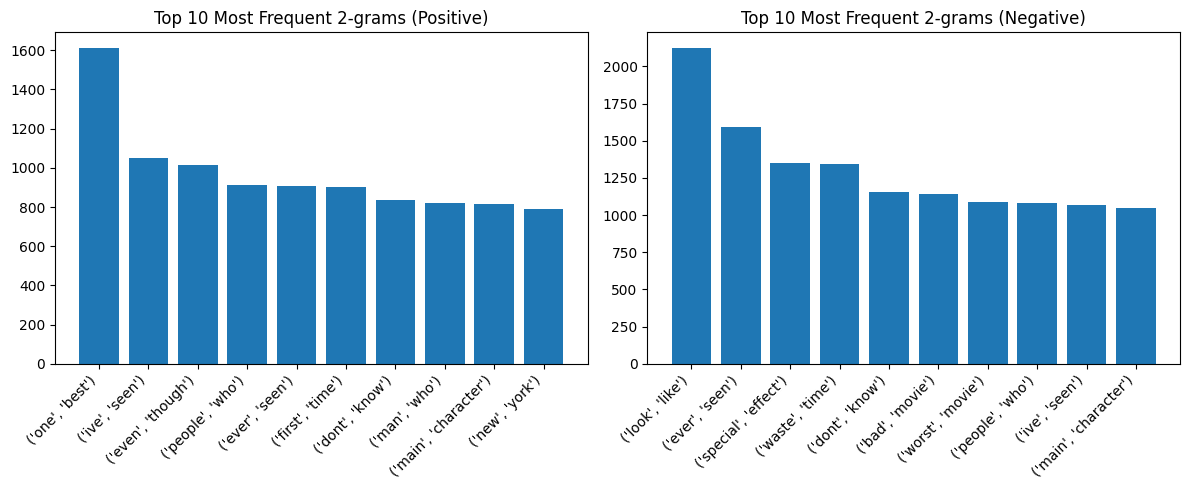

In [82]:
# graficar los mejores 10 ngramas por categoria
top_n = 10

top_positive_ngrams = positive_ngram_counts.most_common(top_n)
top_negative_ngrams = negative_ngram_counts.most_common(top_n)

#Prepare data for plotting
ngrams_pos = [str(ngram) for ngram, count in top_positive_ngrams]
counts_pos = [count for ngram, count in top_positive_ngrams]

ngrams_neg = [str(ngram) for ngram, count in top_negative_ngrams]
counts_neg = [count for ngram, count in top_negative_ngrams]



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(ngrams_pos, counts_pos)
plt.title(f'Top {top_n} Most Frequent {n}-grams (Positive)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(ngrams_neg, counts_neg)
plt.title(f'Top {top_n} Most Frequent {n}-grams (Negative)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Análisis por categorias

In [83]:
positive_reviews = df_preprocessed[df_preprocessed['sentiment'] == 1]['review']
negative_reviews = df_preprocessed[df_preprocessed['sentiment'] == 0]['review']

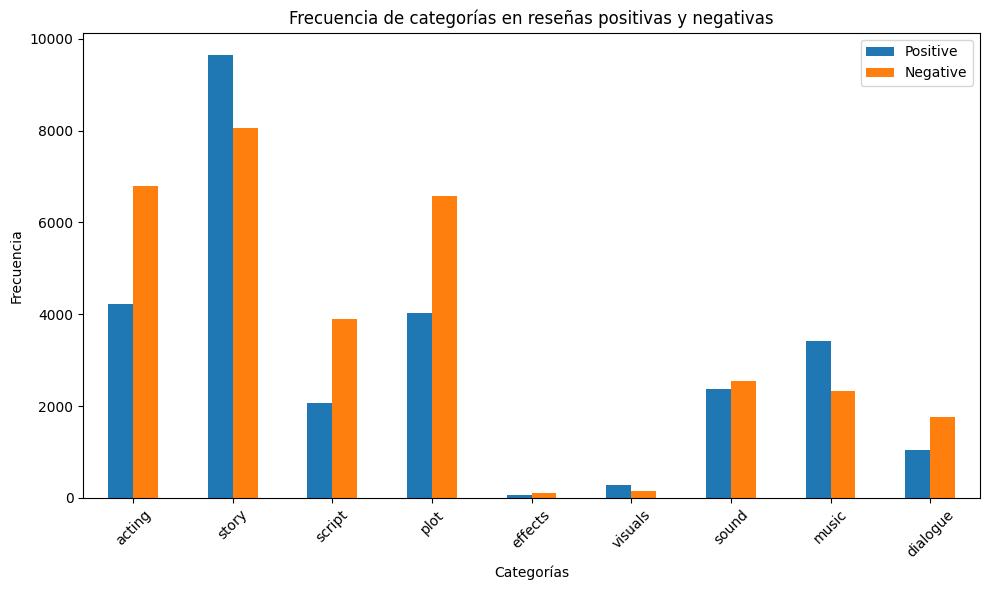

In [84]:
# Categorías clave a analizar
categories = ['acting', 'story', 'script', 'plot', 'effects', 'visuals', 'sound', 'music', 'dialogue']

# Función para buscar frecuencia de las categorías
def category_analysis(reviews, categories):
    frequencies = {}
    #examples = {}
    for category in categories:
        frequencies[category] = reviews.str.contains(category, case=False, na=False).sum()
    return frequencies

# reseñas positivas
positive_freq = category_analysis(positive_reviews, categories)

# reseñas negativas
negative_freq = category_analysis(negative_reviews, categories)

# Crear un DataFrame para frecuencias
freq_df = pd.DataFrame({'Positive': positive_freq, 'Negative': negative_freq})

# Gráfico de frecuencias
freq_df.plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de categorías en reseñas positivas y negativas')
plt.ylabel('Frecuencia')
plt.xlabel('Categorías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
'''import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')'''

"import nltk\nfrom nltk.tokenize import word_tokenize\nfrom nltk import pos_tag\nfrom nltk.corpus import stopwords\nfrom textblob import TextBlob\nimport matplotlib.pyplot as plt\nfrom scipy.stats import ttest_ind\n\n# Descargar recursos necesarios\nnltk.download('punkt')\nnltk.download('punkt_tab')\n\nnltk.download('averaged_perceptron_tagger')\nnltk.download('stopwords')\nnltk.download('averaged_perceptron_tagger_eng')"

In [86]:
'''
# Asume que el DataFrame tiene columnas: 'review' (texto) y 'sentiment' (positivo/negativo)
# Carga los datos
df = df_preprocessed.copy()  # Carga tus datos aquí

# Función para preprocesar y etiquetar partes del discurso
def pos_analysis(text):
    tokens = word_tokenize(text.lower())
    tags = pos_tag(tokens)
    return tags

# Función para contar categorías gramaticales
def count_pos_tags(pos_tags):
    counts = {"adjective": 0, "noun": 0, "verb": 0}
    for word, tag in pos_tags:
        if tag.startswith('JJ'):
            counts['adjective'] += 1
        elif tag.startswith('NN'):
            counts['noun'] += 1
        elif tag.startswith('VB'):
            counts['verb'] += 1
    return counts

# Aplicar el análisis POS y calcular emociones
pos_counts = {"positive": [], "negative": []}
emotion_scores = {"positive": [], "negative": []}

for _, row in df.iterrows():
    sentiment = row['sentiment']  # sentiment is 1 or 0
    review = row['review']
    pos_tags = pos_analysis(review)
    pos_count = count_pos_tags(pos_tags)

    # Convert sentiment to the corresponding key
    sentiment_key = "positive" if sentiment == 1 else "negative"

    # Guardar conteos de partes del discurso using sentiment_key
    pos_counts[sentiment_key].append(pos_count)

    # Analizar emociones
    polarity = TextBlob(review).sentiment.polarity
    emotion_scores[sentiment_key].append(polarity)

# Agregar análisis estadístico
def average_counts(counts_list):
    return {
        "adjective": sum(c['adjective'] for c in counts_list) / len(counts_list),
        "noun": sum(c['noun'] for c in counts_list) / len(counts_list),
        "verb": sum(c['verb'] for c in counts_list) / len(counts_list),
    }

positive_counts_avg = average_counts(pos_counts["positive"])
negative_counts_avg = average_counts(pos_counts["negative"])

# Comparar estadísticamente los resultados
positive_polarity = emotion_scores["positive"]
negative_polarity = emotion_scores["negative"]

# Prueba T para cada categoría gramatical
for category in ["adjective", "noun", "verb"]:
    positive_data = [c[category] for c in pos_counts["positive"]]
    negative_data = [c[category] for c in pos_counts["negative"]]
    stat, p_value = ttest_ind(positive_data, negative_data)
    print(f"{category.capitalize()} - T-test p-value: {p_value}")

# Comparación de emociones
stat, p_value = ttest_ind(positive_polarity, negative_polarity)
print(f"Emotion polarity - T-test p-value: {p_value}")

# Visualización
labels = ['Adjectives', 'Nouns', 'Verbs']
positive_values = [positive_counts_avg['adjective'], positive_counts_avg['noun'], positive_counts_avg['verb']]
negative_values = [negative_counts_avg['adjective'], negative_counts_avg['noun'], negative_counts_avg['verb']]

x = range(len(labels))
plt.bar(x, positive_values, width=0.4, label='Positive', align='center')
plt.bar(x, negative_values, width=0.4, label='Negative', align='edge')
plt.xticks(x, labels)
plt.ylabel('Average Count')
plt.title('POS Tag Comparison')
plt.legend()
plt.show()'''

'\n# Asume que el DataFrame tiene columnas: \'review\' (texto) y \'sentiment\' (positivo/negativo)\n# Carga los datos\ndf = df_preprocessed.copy()  # Carga tus datos aquí\n\n# Función para preprocesar y etiquetar partes del discurso\ndef pos_analysis(text):\n    tokens = word_tokenize(text.lower())\n    tags = pos_tag(tokens)\n    return tags\n\n# Función para contar categorías gramaticales\ndef count_pos_tags(pos_tags):\n    counts = {"adjective": 0, "noun": 0, "verb": 0}\n    for word, tag in pos_tags:\n        if tag.startswith(\'JJ\'):\n            counts[\'adjective\'] += 1\n        elif tag.startswith(\'NN\'):\n            counts[\'noun\'] += 1\n        elif tag.startswith(\'VB\'):\n            counts[\'verb\'] += 1\n    return counts\n\n# Aplicar el análisis POS y calcular emociones\npos_counts = {"positive": [], "negative": []}\nemotion_scores = {"positive": [], "negative": []}\n\nfor _, row in df.iterrows():\n    sentiment = row[\'sentiment\']  # sentiment is 1 or 0\n    revie

In [87]:
df_preprocessed = df_preprocessed.drop('ngrams', axis=1)

In [88]:
df_preprocessed['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [89]:
import numpy as np

In [90]:
clases, conteos = np.unique(y_train, return_counts=True)

for clase, cantidad in zip(clases, conteos):
    print(f"Clase {clase}: {cantidad}")

Clase 0: 20039
Clase 1: 19961


# Preparación de datos tokenización

## Tokenización

In [ ]:

# Descargar recursos necesarios para la tokenización
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#nltk.download('punkt_tab') 




# Ejemplo de texto: Puedes reemplazar esto con tus reseñas
df_preprocessed['tokens'] = df_preprocessed['review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\michael.gomez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\michael.gomez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [92]:
df_preprocessed.head()

,review,sentiment,tokens
0,one reviewer mentioned watching oz episode you...,1,"[one, reviewer, mentioned, watching, oz, episo..."
1,wonderful little production filming technique ...,1,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there family where little boy jake t...,0,"[basically, there, family, where, little, boy,..."
4,petter matteis visually stunning film watch mr...,1,"[petter, matteis, visually, stunning, film, wa..."


## Vectorización

# Embedings Preentrenados

In [93]:
'''import numpy as np
from gensim.models import KeyedVectors

# Ruta del archivo de embeddings preentrenados (asegúrate de tener el archivo)
# Descarga desde https://nlp.stanford.edu/projects/glove/ para GloVe o usa preentrenados de Word2Vec
word_vectors_path = '/content/glove.6B.300d.txt'

# Función para cargar embeddings GloVe
def load_glove_model(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

# Cargar embeddings
embeddings_index = load_glove_model(word_vectors_path)

# Función para convertir tokens a un vector promediado usando embeddings
def tokens_to_vector(tokens, embeddings_index):
    vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(300)  # Vector nulo si no hay palabras conocidas
    return np.mean(vectors, axis=0)

# Convertir cada reseña a un vector
df_preprocessed['vector_glove'] = df_preprocessed['tokens'].apply(lambda x: tokens_to_vector(x, embeddings_index))

# Mostrar los primeros resultados
df_preprocessed[['review', 'vector_glove']].head()'''

"import numpy as np\nfrom gensim.models import KeyedVectors\n\n# Ruta del archivo de embeddings preentrenados (asegúrate de tener el archivo)\n# Descarga desde https://nlp.stanford.edu/projects/glove/ para GloVe o usa preentrenados de Word2Vec\nword_vectors_path = '/content/glove.6B.300d.txt'\n\n# Función para cargar embeddings GloVe\ndef load_glove_model(glove_file):\n    embeddings_index = {}\n    with open(glove_file, 'r', encoding='utf-8') as f:\n        for line in f:\n            values = line.split()\n            word = values[0]\n            vector = np.asarray(values[1:], dtype='float32')\n            embeddings_index[word] = vector\n    return embeddings_index\n\n# Cargar embeddings\nembeddings_index = load_glove_model(word_vectors_path)\n\n# Función para convertir tokens a un vector promediado usando embeddings\ndef tokens_to_vector(tokens, embeddings_index):\n    vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]\n    if len(vectors) == 0:\n  

#TF-IDF

In [94]:
#from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
# Inicializar el vectorizador
#tfidf = TfidfVectorizer(max_features=1000, tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)

# Convertir las reseñas tokenizadas a una matriz TF-IDF
#tfidf_matrix = tfidf.fit_transform(df_preprocessed['tokens'])



In [96]:
# Guardar la matriz en el DataFrame (opcionalmente como una lista para cada reseña)
#df_preprocessed['vector_tfidf'] = list(tfidf_matrix.toarray())


In [97]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D,  Dense, Dropout,LSTM,Input
#GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Tokenización basada en Frecuencias

In [99]:
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_preprocessed['review'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df_preprocessed['review'])

Conjuntos de Entrenamiento y Testeo

In [111]:
#padding
max_length = 100
X = pad_sequences(sequences, maxlen=max_length, padding='post')
y = df_preprocessed['sentiment'].values

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([20039, 19961]))

Embeddings de Glove

In [113]:
# Cargar GloVe
'''glove_path = '/content/glove.6B.300d.txt'

# Cargar embeddings de GloVe
embedding_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Crear la matriz de embeddings

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector'''

"glove_path = '/content/glove.6B.300d.txt'\n\n# Cargar embeddings de GloVe\nembedding_index = {}\nwith open(glove_path, 'r', encoding='utf-8') as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        vector = np.asarray(values[1:], dtype='float32')\n        embedding_index[word] = vector\n\n# Crear la matriz de embeddings\n\nembedding_matrix = np.zeros((vocab_size, embedding_dim))\n\nfor word, i in word_index.items():\n    embedding_vector = embedding_index.get(word)\n    if embedding_vector is not None:\n        embedding_matrix[i] = embedding_vector"

In [114]:
from keras import regularizers


# Creación NN Sin Embeddings Preentrenados

In [115]:
embedding_dim = 100
vocab_size = 25000

In [130]:
model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, trainable=True), #Embedings
    #Conv1D(128, 5, activation='relu'),  #Convoluciones de 5 ngramas
    LSTM(128, return_sequences=False),  #Dependencias más largas
    #GlobalMaxPooling1D(),               #Activadores para priorizar relaciónes
    #Dense(64, activation='relu',),       #Capa densa
    Dropout(0.3),                       #Evitar overfitting
    Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.01)),       #Refina salida
    Dense(1, activation='sigmoid')  # Salida
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) ,
    loss='binary_crossentropy', 
    metrics=['accuracy'])

model.build(input_shape=(None, max_length))
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 100, 100)       │     2,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,409 (10.00 MB)

 Trainable params: 2,621,409 (10.00 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 69ms/step - accuracy: 0.7116 - loss: 0.5546 - val_accuracy: 0.8534 - val_loss: 0.3800
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.8819 - loss: 0.3136 - val_accuracy: 0.8489 - val_loss: 0.3563
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.9129 - loss: 0.2440 - val_accuracy: 0.8581 - val_loss: 0.3654
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.9349 - loss: 0.1954 - val_accuracy: 0.8535 - val_loss: 0.3792
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 103ms/step - accuracy: 0.9493 - loss: 0.1623 - val_accuracy: 0.8534 - val_loss: 0.3863
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.9553 - loss: 0.1406 - val_accuracy: 0.8504 - val_loss: 0.4549
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.9581 - loss: 0.1336 - val_accuracy: 0.8456 - val_loss: 0.5034
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 53s 107ms/step - accuracy: 0.9666 - loss: 0.113

In [132]:
# Evaluar el modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to 0 or 1
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
Accuracy on test set: 0.8462


In [133]:
# Hacer predicciones
y_predlr = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [134]:
# prompt: quiero convertir a y_predlr a cuanto el resutado sea mayor a 0.49 sea 1 y menor a o igual a 0

# Convertir las probabilidades a 0 o 1 según el umbral de 0.49
y_pred_binary = (y_predlr > 0.49).astype(int)

y_pred_binary

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], shape=(10000, 1))

In [135]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Dividir los textos en positivos y negativos
positive_reviews = df[df['sentiment'] == 1]['review']
negative_reviews = df[df['sentiment'] == 0]['review']

# Vectorizar usando TF-IDF
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
positive_matrix = tfidf.fit_transform(positive_reviews)
negative_matrix = tfidf.fit_transform(negative_reviews)

# Extraer vocabulario y puntajes
positive_scores = pd.DataFrame(
    positive_matrix.toarray(), columns=tfidf.get_feature_names_out()
).mean().sort_values(ascending=False)

negative_scores = pd.DataFrame(
    negative_matrix.toarray(), columns=tfidf.get_feature_names_out()
).mean().sort_values(ascending=False)

# Mostrar las palabras más representativas
print("Palabras clave positivas:")
print(positive_scores.head(10))

print("\nPalabras clave negativas:")
print(negative_scores.head(10))
'''

'from sklearn.feature_extraction.text import TfidfVectorizer\nimport pandas as pd\n\n# Dividir los textos en positivos y negativos\npositive_reviews = df[df[\'sentiment\'] == 1][\'review\']\nnegative_reviews = df[df[\'sentiment\'] == 0][\'review\']\n\n# Vectorizar usando TF-IDF\ntfidf = TfidfVectorizer(max_features=500, stop_words=\'english\')\npositive_matrix = tfidf.fit_transform(positive_reviews)\nnegative_matrix = tfidf.fit_transform(negative_reviews)\n\n# Extraer vocabulario y puntajes\npositive_scores = pd.DataFrame(\n    positive_matrix.toarray(), columns=tfidf.get_feature_names_out()\n).mean().sort_values(ascending=False)\n\nnegative_scores = pd.DataFrame(\n    negative_matrix.toarray(), columns=tfidf.get_feature_names_out()\n).mean().sort_values(ascending=False)\n\n# Mostrar las palabras más representativas\nprint("Palabras clave positivas:")\nprint(positive_scores.head(10))\n\nprint("\nPalabras clave negativas:")\nprint(negative_scores.head(10))\n'

In [136]:
'''# Listas de palabras clave por aspecto
aspects = {
    'acting': ['acting', 'performance', 'actor', 'actress', 'cast'],
    'plot': ['plot', 'story', 'narrative', 'screenplay'],
    'visuals': ['visual', 'effects', 'cinematography', 'scenes', 'special effects'],
    'music': ['music', 'soundtrack', 'score', 'audio']
}

# Función para contar ocurrencias de palabras clave en un texto
def count_aspect_mentions(text, aspect_keywords):
    text = text.lower()  # Convertir a minúsculas
    return sum(1 for word in aspect_keywords if word in text)

# Crear columnas para cada aspecto
for aspect, keywords in aspects.items():
    df[aspect] = df['review'].apply(lambda x: count_aspect_mentions(x, keywords))

# Promediar menciones por polaridad
aspect_summary = df.groupby('sentiment')[list(aspects.keys())].mean()

print("Promedio de menciones por polaridad:")
print(aspect_summary)
'''

'# Listas de palabras clave por aspecto\naspects = {\n    \'acting\': [\'acting\', \'performance\', \'actor\', \'actress\', \'cast\'],\n    \'plot\': [\'plot\', \'story\', \'narrative\', \'screenplay\'],\n    \'visuals\': [\'visual\', \'effects\', \'cinematography\', \'scenes\', \'special effects\'],\n    \'music\': [\'music\', \'soundtrack\', \'score\', \'audio\']\n}\n\n# Función para contar ocurrencias de palabras clave en un texto\ndef count_aspect_mentions(text, aspect_keywords):\n    text = text.lower()  # Convertir a minúsculas\n    return sum(1 for word in aspect_keywords if word in text)\n\n# Crear columnas para cada aspecto\nfor aspect, keywords in aspects.items():\n    df[aspect] = df[\'review\'].apply(lambda x: count_aspect_mentions(x, keywords))\n\n# Promediar menciones por polaridad\naspect_summary = df.groupby(\'sentiment\')[list(aspects.keys())].mean()\n\nprint("Promedio de menciones por polaridad:")\nprint(aspect_summary)\n'

In [137]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print(classification_report(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4961
           1       0.83      0.88      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

[[4042  919]
 [ 616 4423]]
Accuracy: 0.8465


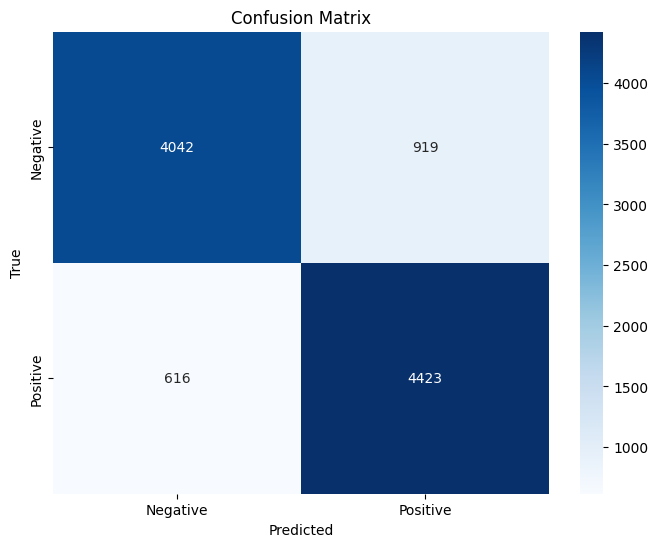

In [138]:
# prompt: GENERA MATRIZ DE CONFUNSION DE MANERA VISUAL

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...

# Assuming y_test and y_pred_binary are defined from your model's prediction
cm = confusion_matrix(y_test, y_pred_binary)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

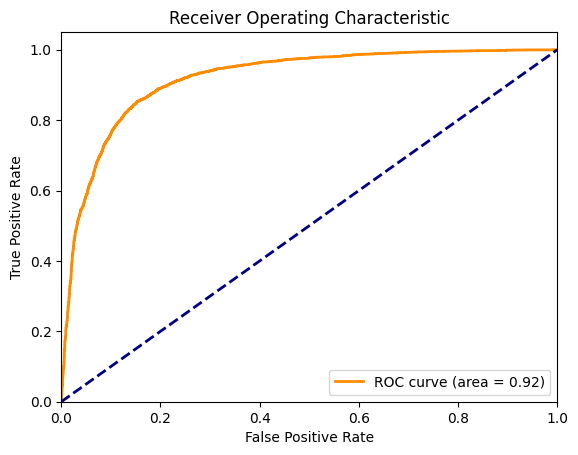

In [139]:
# prompt: genera Curvas ROC Para evaluar la capacidad del modelo para diferenciar entre clases positivas y negativas.

from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Assuming y_test contains the true labels and y_predlr contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_predlr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

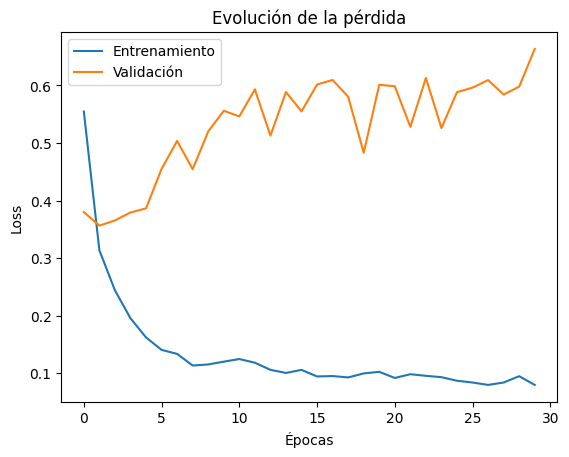

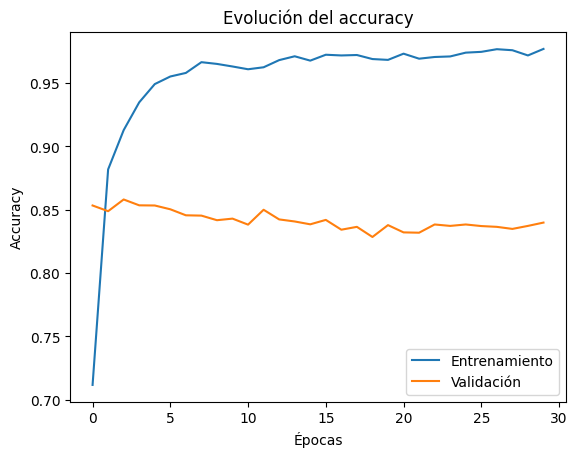

In [140]:
import matplotlib.pyplot as plt

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución de la pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfico de accuracy (si lo tienes en metrics)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Evolución del accuracy')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
